In [24]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Load the data into a Pandas DataFrame
df= pd.read_csv(
    "../Resources/global_food_wastage_dataset.csv",
    index_col="Country")

# Display sample data
df.head(10)

,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
Country,,,,,,,
Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06
India,2024,Fruits & Vegetables,11962.89,11196.04,136.21,1311.91,37.09
Germany,2024,Prepared Food,45038.72,39191.25,179.27,1349.45,68.93
China,2019,Fruits & Vegetables,12791.20,12233.28,90.80,1229.29,59.90
UK,2019,Meat & Seafood,14795.65,14346.97,128.91,450.33,59.01


In [26]:
df.info()
#No Null values-no need for imputation 
#Food Category is a string-May need encoding

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, Australia to France
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5000 non-null   int64  
 1   Food Category              5000 non-null   object 
 2   Total Waste (Tons)         5000 non-null   float64
 3   Economic Loss (Million $)  5000 non-null   float64
 4   Avg Waste per Capita (Kg)  5000 non-null   float64
 5   Population (Million)       5000 non-null   float64
 6   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 312.5+ KB


In [4]:
# Generate summary statistics
df.describe()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


In [ ]:
#Going to need a scalar

In [ ]:
sns.pairplot(data=df)
plt.show()

In [27]:
df = df.drop(columns=["Food Category"])


In [ ]:
#Look at Economic loss and total waste, strong correlation

In [28]:
df.columns

Index(['Year', 'Total Waste (Tons)', 'Economic Loss (Million $)',
       'Avg Waste per Capita (Kg)', 'Population (Million)',
       'Household Waste (%)'],
      dtype='object')

In [39]:
num_cols = ['Total Waste (Tons)',
       'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)',
       'Population (Million)', 'Household Waste (%)']

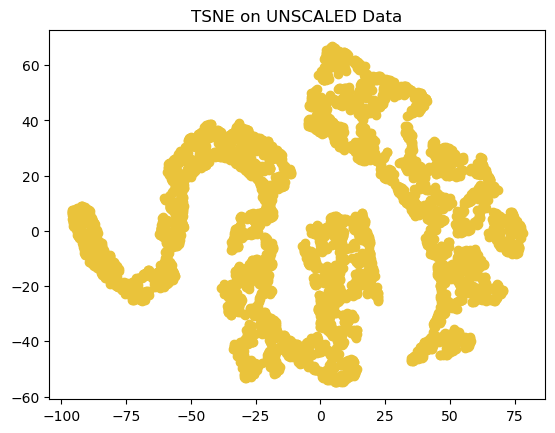

In [9]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df.loc[:, num_cols])) # fit UNSCALED data
colors = ['#EAC33B']

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=colors)
plt.title("TSNE on UNSCALED Data")
plt.savefig("tsne_clusters.png", dpi=300, bbox_inches='tight')  # Save to file
plt.show()

In [ ]:
# Correlations
corrs = df_scaled.corr()
corrs

In [ ]:
sns.heatmap(corrs)
plt.show()

## Unsupervised Clustering

In [30]:
# Do Unsupervised Clustering

# KMeans not scaled

# Define your "X" - features to predict
X = df

In [31]:
# Create a a list to store inertia values and the values of k
inertia = []
s_scores = []
vrc_scores = []

k = list(range(2, 20))

# LOOP 
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,inertia,s_score,vrc_scores
0,2,5.487138e+11,0.608303,13982.412812
1,3,2.655289e+11,0.552671,17109.337362
2,4,1.649537e+11,0.513858,19373.594158
3,5,1.158841e+11,0.488037,21206.717831
4,6,8.893806e+10,0.467383,22403.391812
5,7,7.193301e+10,0.448721,23275.171776
6,8,6.015861e+10,0.436338,23990.524918
7,9,5.295206e+10,0.419105,23927.649542
8,10,4.821539e+10,0.419208,23408.301883
9,11,4.233594e+10,0.405964,24057.791638


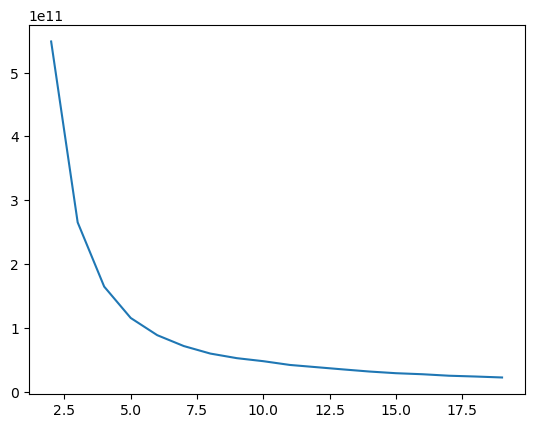

In [32]:
plt.plot(df_metrics.k, df_metrics.inertia)
plt.show()

## Agglomerative Clustering

In [10]:
# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 20))

# LOOP 
for i in k:
    # Fit the Model
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.602722,13560.416801
1,3,0.496820,13516.573379
2,4,0.492910,17753.832987
3,5,0.478608,19114.271412
4,6,0.417686,18619.739245
5,7,0.416367,19696.195466
6,8,0.386426,20821.412867
7,9,0.388041,21685.875847
8,10,0.386397,21335.509612
9,11,0.384204,21012.058401


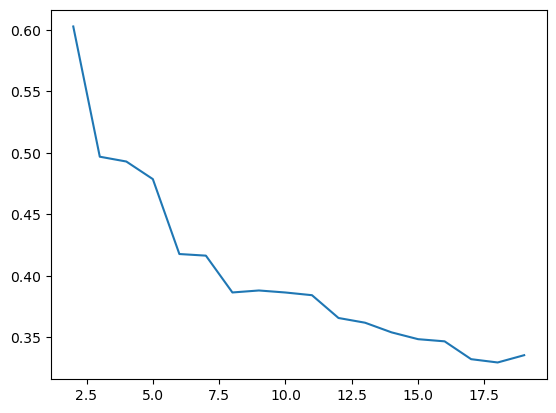

In [11]:
plt.plot(df_metrics.k, df_metrics.s_score)
plt.show()

In [15]:
#BIRCH
# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 20))

# LOOP 
for i in k:
    # Fit the Model
    model = Birch(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.602722,13560.416801
1,3,0.496820,13516.573379
2,4,0.492910,17753.832987
3,5,0.478608,19114.271412
4,6,0.417686,18619.739245
5,7,0.416367,19696.195466
6,8,0.386426,20821.412867
7,9,0.388041,21685.875847
8,10,0.386397,21335.509612
9,11,0.384204,21012.058401


## Visualize the K Means best model

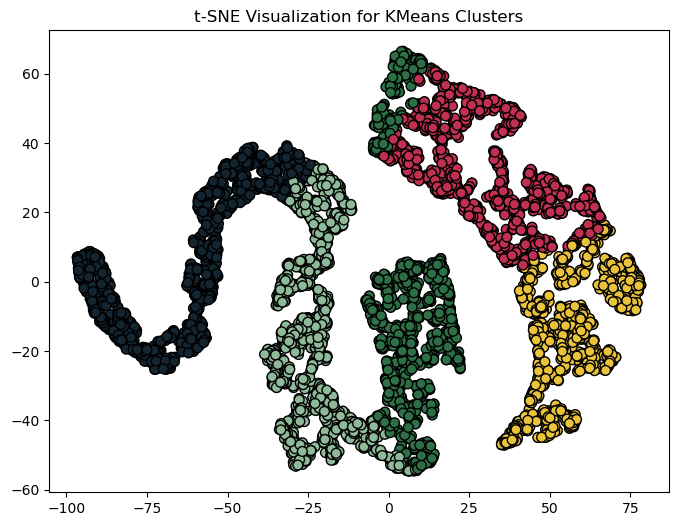

In [34]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd

# Copy data
df_sub = X.copy()  # X is your scaled feature data

# KMeans clustering
model = KMeans(n_clusters=5, random_state=1)
preds = model.fit_predict(X)

# Assign cluster labels
df_sub['clusters'] = preds

# Run t-SNE
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(X))  # TSNE on scaled data
df_tsne['cluster'] = preds  # Add cluster labels for coloring

# Define your custom colors for each cluster
colors = ['#142532', '#C13050', '#2E7046', '#EAC33B', '#8EBA99']
point_colors = [colors[label] for label in df_tsne['cluster']]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[0], df_tsne[1], c=point_colors, s=50, edgecolor='k')
plt.title("t-SNE Visualization for KMeans Clusters")
plt.grid(False)  # No grid!
#plt.savefig("tsne_clusters.png", dpi=300, bbox_inches='tight')

In [35]:
df_tsne.groupby('cluster').mean()

,0,1
cluster,,
0,-62.014263,6.455393
1,30.442802,31.767656
2,6.469391,-5.062956
3,55.977448,-15.549690
4,-22.228899,-15.879734


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features
categorical = ['Food Category']
numeric = ['Total Waste (Tons)', 'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)', 
           'Population (Million)', 'Household Waste (%)']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(), categorical),
    ('num', StandardScaler(), numeric)
])

X_preprocessed = preprocessor.fit_transform(df)

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)

df['cluster'] = clusters

In [50]:
cluster_summary = df.groupby('cluster')[numeric].mean()
print(cluster_summary)

         Total Waste (Tons)  Economic Loss (Million $)  \
cluster                                                  
0              13632.782203               13432.725604   
1              37802.786824               37872.582091   
2              38963.680421               39283.534606   
3              14312.118363               14080.905211   
4              14626.315900               14467.358987   

         Avg Waste per Capita (Kg)  Population (Million)  Household Waste (%)  
cluster                                                                        
0                       106.540428           1116.193978            50.031571  
1                       156.283795            655.637255            49.172478  
2                        65.361346            813.165009            51.286172  
3                       101.198387            415.937966            61.084777  
4                       113.957247            401.115888            38.815387  


In [16]:
# Make a copy
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=5, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub['clusters'] = preds

df_sub.head()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),clusters
Country,,,,,,,
Australia,2019,19268.63,18686.68,72.69,87.59,53.64,4
Indonesia,2019,3916.97,4394.48,192.52,1153.99,30.61,0
Germany,2022,9700.16,8909.16,166.94,1006.11,48.08,0
France,2023,46299.69,40551.22,120.19,953.05,31.91,3
France,2023,33096.57,36980.82,104.74,1105.47,36.06,1


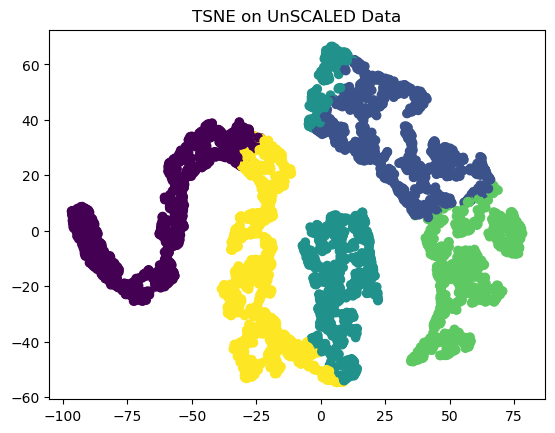

In [17]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("KMeans on Unscaled Data")
plt.show()

In [ ]:
# Make a copy
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=3, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub['clusters'] = preds

df_sub.head()

In [ ]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on UnScaled KMeans Data 3 Clusters")
plt.show()

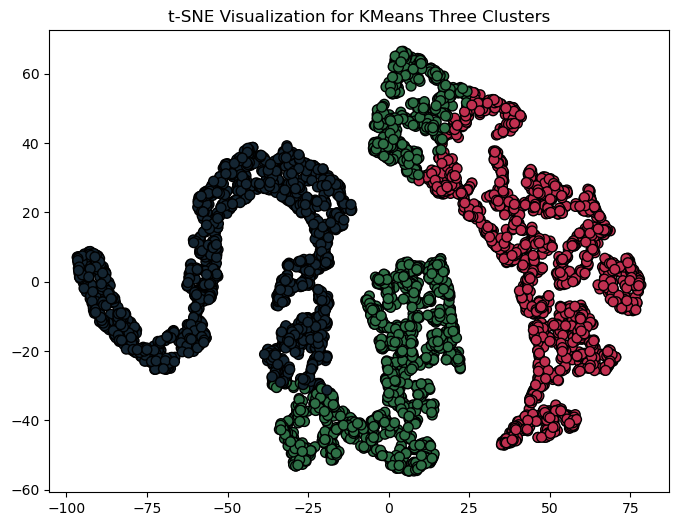

In [23]:
# Copy data
df_sub = X.copy()  # X is your scaled feature data

# KMeans clustering
model = KMeans(n_clusters=3, random_state=1)
preds = model.fit_predict(X)

# Assign cluster labels
df_sub['clusters'] = preds

# Run t-SNE
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(X))  # TSNE on scaled data
df_tsne['cluster'] = preds  # Add cluster labels for coloring

# Define your custom colors for each cluster
colors = ['#142532', '#C13050', '#2E7046']
point_colors = [colors[label] for label in df_tsne['cluster']]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[0], df_tsne[1], c=point_colors, s=50, edgecolor='k')
plt.title("t-SNE Visualization for KMeans Three Clusters")
plt.grid(False)  # No grid!
plt.savefig("tsne_kmeans3.png", dpi=300, bbox_inches='tight')

## Fitting to Agglomerative Clustering

In [ ]:
# Make a copy
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = AgglomerativeClustering(n_clusters=3)

# Fit the model
model.fit(X)

# Get cluster labels
df_sub['clusters'] = model.labels_

df_sub.head()

In [ ]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on Agglomerative Data 3 Clusters")
plt.show()

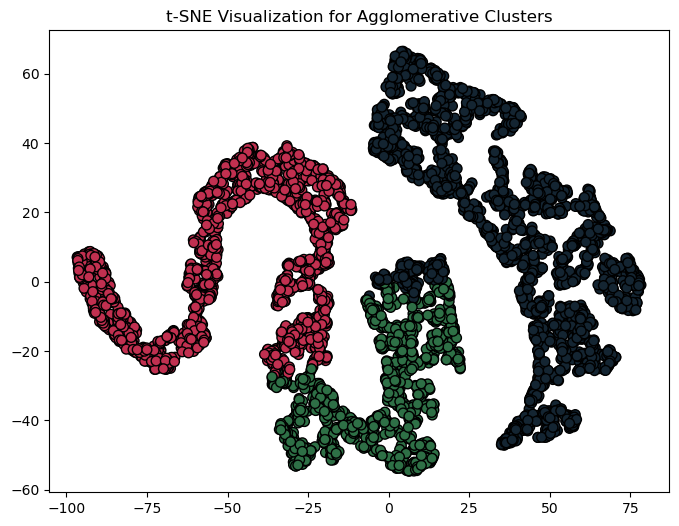

In [24]:
# Copy data
df_sub = X.copy()  # X is your scaled feature data

# KMeans clustering
model = AgglomerativeClustering(n_clusters=3)
preds = model.fit_predict(X)

# Assign cluster labels
df_sub['clusters'] = preds

# Run t-SNE
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(X))  # TSNE on scaled data
df_tsne['cluster'] = preds  # Add cluster labels for coloring

# Define your custom colors for each cluster
colors = ['#142532', '#C13050', '#2E7046']
point_colors = [colors[label] for label in df_tsne['cluster']]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[0], df_tsne[1], c=point_colors, s=50, edgecolor='k')
plt.title("t-SNE Visualization for Agglomerative Clusters")
plt.grid(False)  # No grid!
plt.savefig("tsne_Agglomerative.png", dpi=300, bbox_inches='tight')

## Fitting on Birch Clustering

In [ ]:
# Make a copy
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = Birch(n_clusters=3)

# Fit the model
model.fit(X)

# Get cluster labels
df_sub['clusters'] = model.labels_

df_sub.head()

In [ ]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on Birch Data 3 Clusters")
plt.show()

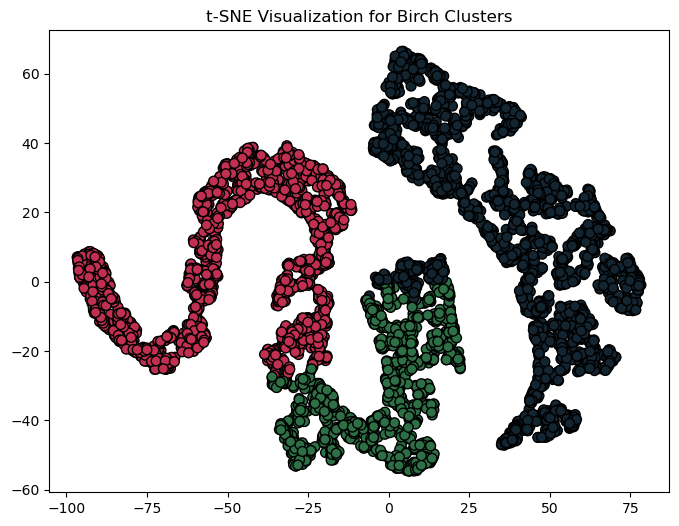

In [25]:
# Copy data
df_sub = X.copy()  # X is your scaled feature data

# KMeans clustering
model = Birch(n_clusters=3)
preds = model.fit_predict(X)

# Assign cluster labels
df_sub['clusters'] = preds

# Run t-SNE
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(X))  # TSNE on scaled data
df_tsne['cluster'] = preds  # Add cluster labels for coloring

# Define your custom colors for each cluster
colors = ['#142532', '#C13050', '#2E7046']
point_colors = [colors[label] for label in df_tsne['cluster']]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[0], df_tsne[1], c=point_colors, s=50, edgecolor='k')
plt.title("t-SNE Visualization for Birch Clusters")
plt.grid(False)  # No grid!
plt.savefig("tsne_birch.png", dpi=300, bbox_inches='tight')